In [1]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2023-11-25 18:42:36--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2023-11-25 18:42:36 (42.2 MB/s) - ‘dataset.py’ saved [917/917]

--2023-11-25 18:42:36--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda

In [2]:
# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

In [3]:
# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=28)

In [4]:
# Preprocess input data
'''standard our data values to the range [-1, 1]'''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = (X_train - 127.5) / 127.5
X_test = (X_test - 127.5) / 127.5

In [5]:
# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [6]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
# 6. Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

In [8]:
# 7. Create a ReduceLROnPlateau callback
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [9]:
# 7. Fit model on training data
history = model.fit(X_train, y_train,
          epochs=100, batch_size=256, validation_split=0.2, callbacks=[reduce_lr_callback])

Epoch 1/100
11/11 [==============================] - 8s 432ms/step - loss: 1.4885 - sparse_categorical_accuracy: 0.5461 - val_loss: 2.0045 - val_sparse_categorical_accuracy: 0.6786 - lr: 0.0010
Epoch 2/100
11/11 [==============================] - 3s 310ms/step - loss: 0.5660 - sparse_categorical_accuracy: 0.8229 - val_loss: 1.8394 - val_sparse_categorical_accuracy: 0.7543 - lr: 0.0010
Epoch 3/100
11/11 [==============================] - 3s 304ms/step - loss: 0.3962 - sparse_categorical_accuracy: 0.8714 - val_loss: 1.8142 - val_sparse_categorical_accuracy: 0.5600 - lr: 0.0010
Epoch 4/100
11/11 [==============================] - 5s 461ms/step - loss: 0.2784 - sparse_categorical_accuracy: 0.9211 - val_loss: 1.8556 - val_sparse_categorical_accuracy: 0.3957 - lr: 0.0010
Epoch 5/100
11/11 [==============================] - 4s 310ms/step - loss: 0.2262 - sparse_categorical_accuracy: 0.9389 - val_loss: 1.9005 - val_sparse_categorical_accuracy: 0.3214 - lr: 0.0010
Epoch 6/100
11/11 [===========

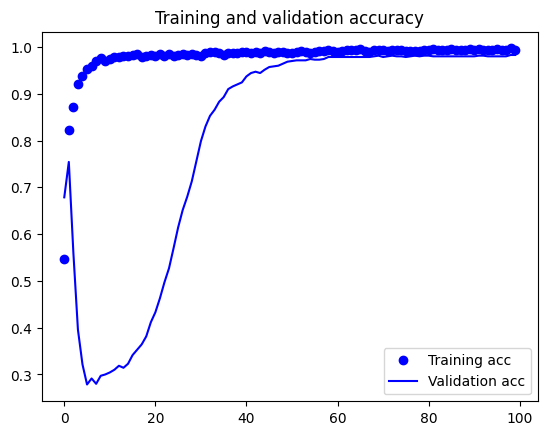

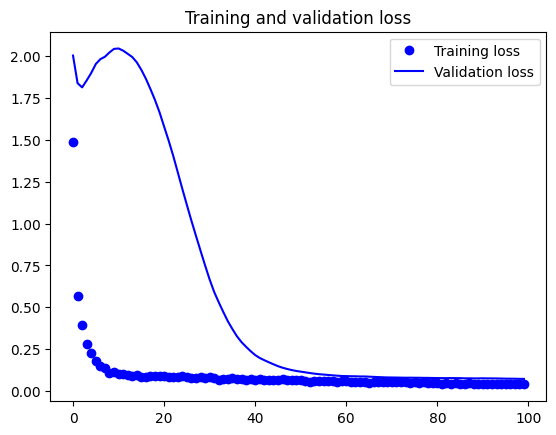

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()